In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/2016.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Year,Tourn.#,Player_#,Course_#,Permanent_Tournament_#,Player_First_Name,Player_Last_Name,Round,Tournament_Name,Course_Name,...,Started_at_Z,Distance_from_hole,Strokes_Gained,Cat,Green_to_work_with,Difficulty_Baseline,Correction,Difficulty_Start,Difficulty_End,New_Strokes_Gained
0,2016,330,32618,513,25,Rhein,Gibson,1,FedEx St. Jude Classic,TPC Southwind,...,NaN,1422.010460,0.130244,Tee Box,NaN,NaN,0,4.227273,3.514310,-0.287037
1,2016,420,24511,715,33,Thongchai,Jaidee,2,PGA Championship,Baltusrol GC,...,NaN,1075.871226,0.138178,Tee Box,NaN,NaN,0,3.909677,2.887478,0.022199
2,2016,460,25686,752,13,Jason,Dufner,1,Wyndham Championship,Sedgefield CC,...,NaN,1576.939583,0.219823,Tee Box,NaN,NaN,0,4.435115,3.241839,0.193275
3,2016,460,6332,752,13,Neal,Lancaster,1,Wyndham Championship,Sedgefield CC,...,NaN,538.951350,-0.330270,Tee Box,NaN,NaN,0,3.071429,2.237227,-0.165799
4,2016,450,30692,669,30,Scott,Stallings,4,John Deere Classic,TPC Deere Run,...,NaN,1129.904414,-0.000230,Tee Box,NaN,NaN,0,3.931507,2.928878,0.002629


In [215]:
data[(data.Shot!=1) & (data.Cat!='Green')].shape

(297369, 52)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903478 entries, 201152 to 696766
Data columns (total 52 columns):
Year                               903478 non-null int64
Tourn.#                            903478 non-null int64
Player_#                           903478 non-null int64
Course_#                           903478 non-null int64
Permanent_Tournament_#             903478 non-null int64
Player_First_Name                  903478 non-null object
Player_Last_Name                   903478 non-null object
Round                              903478 non-null int64
Tournament_Name                    903478 non-null object
Course_Name                        903478 non-null object
Hole                               903478 non-null int64
Hole_Score                         903478 non-null float64
Par_Value                          903478 non-null int64
Yardage                            903478 non-null int64
Shot                               903478 non-null int64
Shot_Type(S/P/D)       

In [162]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start)**2)**.5

0.49222364998111306

In [163]:
data[['Shots_taken_from_location','Strokes_Gained/Baseline','New_Strokes_Gained','Strokes_Gained']].head(5)

,Shots_taken_from_location,Strokes_Gained/Baseline,New_Strokes_Gained,Strokes_Gained
201152,4,0.017,0.211214,0.137647
238308,3,-0.644,-0.624658,-0.620946
643350,2,0.245,0.212545,0.356282
752441,1,0.333,0.354744,0.280863
175510,5,0.095,0.139868,0.041976


In [164]:
data = data.drop('Difficulty_Start_old',axis=1)

In [165]:
data.insert(len(data.columns),'Difficulty_Start_old',[0]*len(data))

In [166]:
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_old'] = data[data.Shot==data.Hole_Score].Strokes_Gained + 1
data.loc[data.Difficulty_Start_old<1,'Difficulty_Start_old'] = 1

In [167]:
data=data.sort_values(['Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_old'] = \
                                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_old.values +\
                                                    data[(data.Hole_Score==i) & (data.Shot==j)].Strokes_Gained.values + 1
        data.loc[data.Difficulty_Start_old<1,'Difficulty_Start_old'] = 1

In [168]:
data.Difficulty_Start_old.describe()

count    903478.000000
mean          2.515131
std           1.121885
min           1.000000
25%           1.343104
50%           2.548354
75%           3.353205
max           5.385216
Name: Difficulty_Start_old, dtype: float64

In [169]:
data.Difficulty_Start.describe()

count    903478.000000
mean          2.538521
std           1.124146
min           1.000000
25%           1.544086
50%           2.561911
75%           3.364238
max           5.294118
Name: Difficulty_Start, dtype: float64

In [170]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_old)**2)**.5

0.5167688233505884

In [178]:
data = data.drop('Difficulty_Start_exp',axis=1)

In [179]:
data.insert(len(data.columns),'Difficulty_Start_exp',[0]*len(data))

In [180]:
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_exp'] = data[data.Shot==data.Hole_Score].New_Strokes_Gained + 1
data.loc[data.Difficulty_Start_old<1,'Difficulty_Start_exp'] = 1

In [181]:
data=data.sort_values(['Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_exp'] = \
                                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_exp.values +\
                                                    data[(data.Hole_Score==i) & (data.Shot==j)].New_Strokes_Gained.values + 1
        data.loc[data.Difficulty_Start_exp<1,'Difficulty_Start_exp'] = 1

In [182]:
data.Difficulty_Start_exp.describe()

count    903478.000000
mean          2.538521
std           1.124146
min           1.000000
25%           1.544086
50%           2.561911
75%           3.364238
max           5.294118
Name: Difficulty_Start_exp, dtype: float64

In [183]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_exp)**2)**.5

0.492223649981131

In [149]:
data = data.drop('Difficulty_Start_broadie',axis=1)

In [150]:
data.insert(len(data.columns),'Difficulty_Start_broadie',[0]*len(data))

In [151]:
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_broadie'] = data[data.Shot==data.Hole_Score]['Strokes_Gained/Baseline'] + 1
data.loc[data.Difficulty_Start_broadie<1,'Difficulty_Start_broadie'] = 1

In [152]:
data=data.sort_values(['Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_broadie'] = \
                                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_broadie.values +\
                                                    data[(data.Hole_Score==i) & (data.Shot==j)]['Strokes_Gained/Baseline'].values + 1
        data.loc[data.Difficulty_Start_broadie<1,'Difficulty_Start_broadie'] = 1

In [153]:
data.Difficulty_Start_broadie.describe()

count    903478.000000
mean          2.548462
std           1.137123
min           1.000000
25%           1.544000
50%           2.559000
75%           3.350000
max           5.031000
Name: Difficulty_Start_broadie, dtype: float64

In [31]:
data.loc[data.Shot==1,'Difficulty_Start_broadie'] = data[data.Shot==1].Difficulty_Start

In [154]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_broadie)**2)**.5

0.49572168492165336

In [156]:
np.mean((data.Shots_taken_from_location-(data.Difficulty_Start_broadie+data.Difficulty_Start)/2)**2)**.5

0.4921490959414464

In [197]:
data = data.drop(['Strokes_Gained_ensemble','Difficulty_Start_ensemble'],axis=1)

In [198]:
data.insert(len(data.columns),'Strokes_Gained_ensemble',data.Strokes_Gained-data.Correction)

In [199]:
data.insert(len(data.columns),'Difficulty_Start_ensemble',[0]*len(data))

In [200]:
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_ensemble'] = data[data.Shot==data.Hole_Score].Strokes_Gained_ensemble + 1
data.loc[data.Difficulty_Start_ensemble<1,'Difficulty_Start_ensemble'] = 1

In [201]:
data=data.sort_values(['Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_ensemble'] = \
                                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_ensemble.values +\
                                                    data[(data.Hole_Score==i) & (data.Shot==j)].Strokes_Gained_ensemble.values + 1
        data.loc[data.Difficulty_Start_ensemble<1,'Difficulty_Start_ensemble'] = 1
        data.loc[data.Difficulty_Start_ensemble<1,'Difficulty_Start_ensemble'] = 1

In [202]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_ensemble)**2)**.5

0.5167318977542543

In [203]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_old)**2)**.5

0.5167688233505884

In [204]:
np.mean((data[data.Cat=='Green'].Shots_taken_from_location-data[data.Cat=='Green'].Difficulty_Start_ensemble)**2)**.5

0.38174287896900644

In [205]:
np.mean((data[data.Cat=='Green'].Shots_taken_from_location-data[data.Cat=='Green'].Difficulty_Start_old)**2)**.5

0.38183991328997247

In [213]:
(0.49572168492165336-0.4921490959414464)/0.49572168492165336

0.007206844261355222

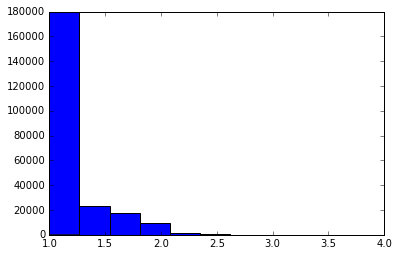

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data[data.Shot==data.Hole_Score].Difficulty_Start.values,10);

In [212]:
data.sort_values('New_Strokes_Gained',ascending=False)[['New_Strokes_Gained','Strokes_Gained','Strokes_Gained/Baseline']]

,New_Strokes_Gained,Strokes_Gained,Strokes_Gained/Baseline
373509,2.692250,2.284075,2.541
347495,2.684725,2.641109,2.609
434985,2.527545,2.607725,2.516
401242,2.437059,2.364084,2.499
401611,2.428382,2.587039,2.380
382801,2.341731,2.325771,2.336
379452,2.261159,1.972524,2.192
378331,2.249518,1.687638,2.185
405890,2.240852,2.532366,2.234
381124,2.234804,2.238354,2.284
